In [1]:
import os
import numpy
import pandas as pd
import subprocess
from andromedaPy import galaxy
if os.getenv('LAUNCH')==None :
    print('warning,  bootup Jupyter after ignition.sh')
import h5py 
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
##BEGINNINGS of a control panel in Jupyter

In [3]:
##directory of file
op = '2B3D/1'

In [4]:
launch =  '/home/user/Andromeda/launchPad/'
bash = launch + '/../bash/'
os.chdir(launch+op)

In [5]:
##make the foundation in jupyter.


g = galaxy()
g.read_record('found/found').fieldInputs(OpIndex = -1)
g.i()
dims = g.dims()

D, B = (numpy.shape(dims))
print(D,B)
x = 2
n = 1.5

l = pd.DataFrame()
for ll in range(numpy.power(x,D*B)):
    row = pd.DataFrame(index = [ll])
    mm = 1
    for d in range(D):
        for b in range(B):
            row[str(d)+str(b+1)+'m'] = int(ll/mm)%x
            row[str(d)+str(b+1)+'n'] = n
            mm *= x
    l = pd.concat([l,row])
    
l.to_csv('foundation.csv')

3 1


In [6]:
##read some parameters
N = g.comps()[0][0]
lattice = g.dims()[0][0]['lattice']
N,lattice

(21, 0.2)

In [7]:
##load up to SG's
l = pd.read_csv('foundation.csv').drop('Unnamed: 0',axis=1)

if True:
    reset = 1
    index = 0
    for i in l.index:
        g.setCurrent(Current = 0)
        print((l.loc[i]).values)
        g.SG(gammaPy = numpy.reshape(l.loc[i].values,(D,B,2)))
        g.to_file(reset = reset, index = index )
        index += 1
        reset = 0


[0.  1.5 0.  1.5 0.  1.5]
[1.  1.5 0.  1.5 0.  1.5]
[0.  1.5 1.  1.5 0.  1.5]
[1.  1.5 1.  1.5 0.  1.5]
[0.  1.5 0.  1.5 1.  1.5]
[1.  1.5 0.  1.5 1.  1.5]
[0.  1.5 1.  1.5 1.  1.5]
[1.  1.5 1.  1.5 1.  1.5]


In [8]:
gto = [D*[B*[2,0.1/lattice,0]]]

In [9]:
if True:
    for i in range(len(gto)):
        
        g.setCurrent(Current = 0)
        g.GTO(gammaPy = numpy.reshape(gto,(D,B,3)))
        g.to_file(reset = reset, index = index )
        index += 1
        reset = 0



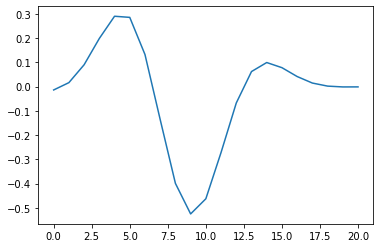

In [10]:
if B == 1:
    plt.plot(numpy.reshape(list(h5py.File('found/found.3.0_mac','r')['  0-0'])[:N],(N)))
else:
    plt.contour(numpy.reshape(list(h5py.File('found/found.4.0_mac','r')['  0-0'])[:N*N],(N,N)))

In [11]:
subprocess.call(['bash',bash+'launcher.sh', 'found/C','1/B'])

0

In [12]:
index = index
di= 'found'
h = numpy.zeros((index,index))
s = numpy.zeros((index,index))
for i in g.terms():
    h += (numpy.reshape(list(h5py.File(di+'/C.' + str(i+1)+'.riz.2.0_mac','r')['  0-0'])[:index*index],(index,index)))
s = (numpy.reshape(list(h5py.File(di+'/C.' + str(i+1)+'.riz.1.0_mac','r')['  0-0'])[:index*index],(index,index)))
numpy.sort(linalg.eigvals(h,s))

array([4.86685558e+03+0.j, 5.07574552e+03+0.j, 5.52381201e+03+0.j,
       5.82257873e+03+0.j, 5.90393285e+03+0.j, 5.92095676e+03+0.j,
       6.72667855e+03+0.j, 2.29775310e+04+0.j, 1.19628233e+09+0.j])

In [13]:
subprocess.call(['bash',bash+'launcher.sh', '1/B'])

0

In [14]:
index = 6
di= '12'
h = numpy.zeros((index,index))
s = numpy.zeros((index,index))
for i in g.terms():
    h += (numpy.reshape(list(h5py.File(di+'/C.' + str(i+1)+'.riz.2.0_mac','r')['  0-0']),(index,index)))
s = (numpy.reshape(list(h5py.File(di+'/C.' + str(i+1)+'.riz.1.0_mac','r')['  0-0']),(index,index)))

numpy.sort(linalg.eigvals(h,s))

array([3.91453123e+03+0.j, 4.53492720e+03+0.j, 4.67149591e+03+0.j,
       1.88826509e+07+0.j, 9.78737101e+08+0.j, 8.32975695e+09+0.j])

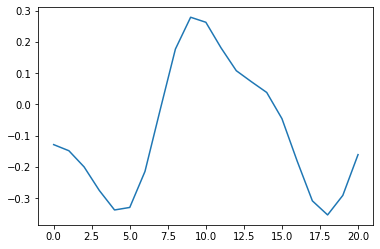

In [15]:
if B == 2:
    plt.contour(numpy.reshape(list(h5py.File('1/D.kry.1.1.0_mac','r')['  0-0'])[:N*N],(N,N)))
elif B == 1:
    plt.plot(numpy.reshape(list(h5py.File('12/D.kry.1.1.0_mac','r')['  0-0'])[:N],(N)))

In [15]:
def inspectState(handle, state):
    v = galaxy()
    v.read_record(handle+'/D.kry.'+str(state)).fieldInputs(OpIndex = -1)
    v.i()
    v.read_file(handle+'/D.kry.'+str(state)+'.vector')
    v.expectation()
    del v

In [ ]:
inspectState('12',1)